In [175]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

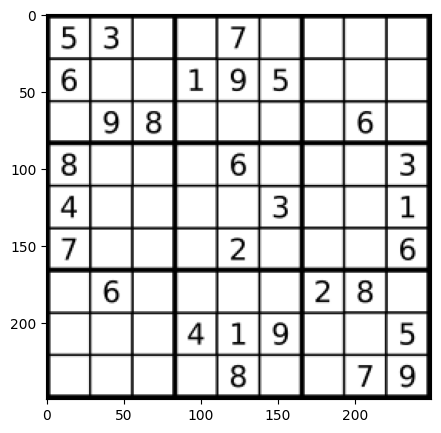

In [474]:
img=cv2.imread("../img/sudoku.png")
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

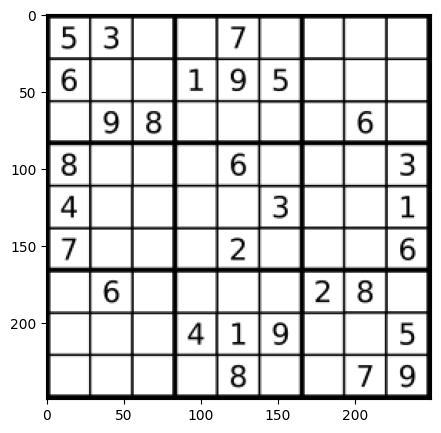

In [475]:
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgGray,cmap="gray")
plt.show()

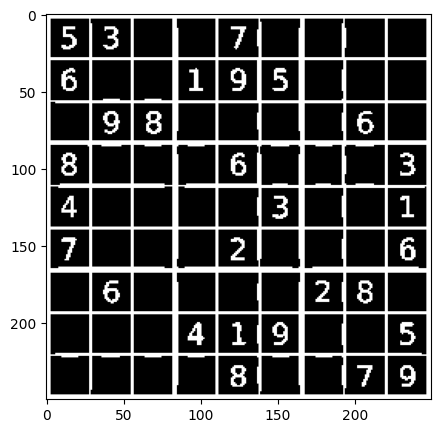

In [476]:
imgGrayInv=cv2.bitwise_not(imgGray)
imgThresh=cv2.adaptiveThreshold(imgGrayInv,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgThresh,cmap="gray")
plt.show()

In [477]:
horizontal=np.copy(imgThresh)
vertical=np.copy(imgThresh)

In [478]:
cols=horizontal.shape[1]
horizontal_size=cols//10

In [479]:
horizontalStructure=cv2.getStructuringElement(cv2.MORPH_RECT,(horizontal_size,1))

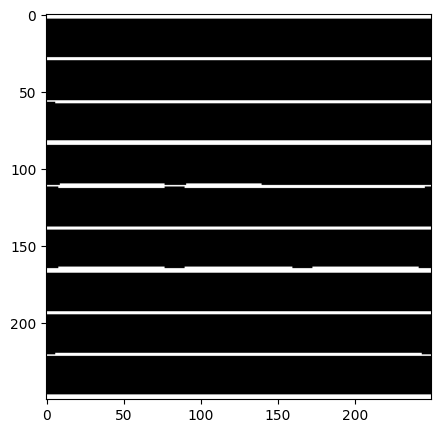

In [480]:
horizontal=cv2.erode(horizontal,horizontalStructure)
horizontal=cv2.dilate(horizontal,horizontalStructure)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(horizontal,cmap="gray")
plt.show()

In [481]:
rows=vertical.shape[1]
vertical_size=cols//10

In [482]:
verticalStructure=cv2.getStructuringElement(cv2.MORPH_RECT,(1,vertical_size))

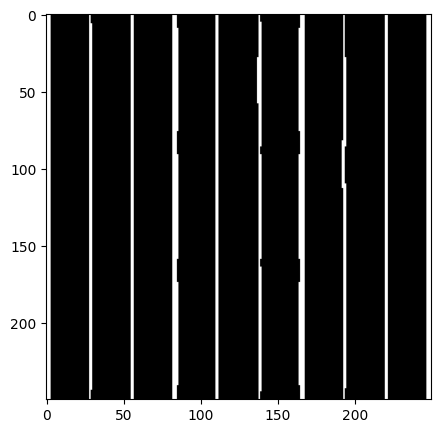

In [483]:
vertical=cv2.erode(vertical,verticalStructure)
vertical=cv2.dilate(vertical,verticalStructure)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(vertical,cmap="gray")
plt.show()

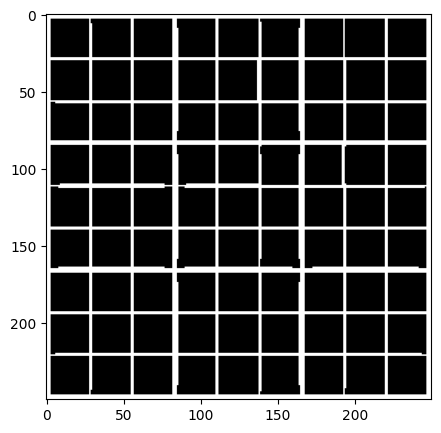

In [484]:
concatenate=cv2.bitwise_or(vertical,horizontal)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(concatenate,cmap="gray")
plt.show()

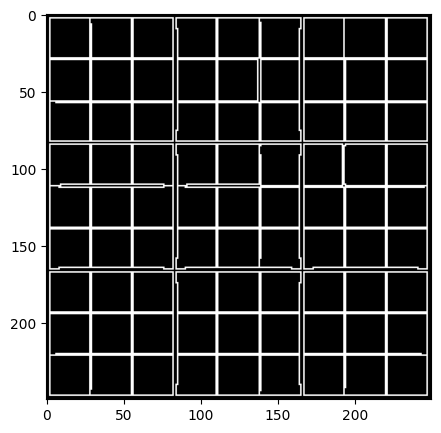

In [485]:
edges=cv2.adaptiveThreshold(concatenate,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(edges,cmap="gray")
plt.show()

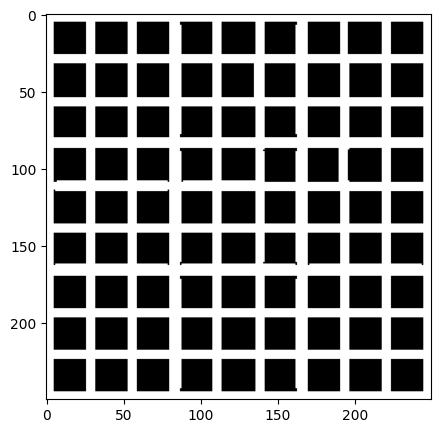

In [486]:
kernel=np.ones((5,5),np.uint8)
edges=cv2.dilate(edges,kernel)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(edges,cmap="gray")
plt.show()

In [487]:
imgSmooth=cv2.blur(edges,(2,2))

In [488]:
cnts,hierarchy=cv2.findContours(image=edges,mode=cv2.RETR_TREE,method=cv2.CHAIN_APPROX_NONE)
newImage=imgGray.copy()
cv2.drawContours(image=newImage,contours=cnts,contourIdx=-1,color=(0,0,255),thickness=2,lineType=cv2.LINE_AA)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 6, ..., 6, 0, 0],
       ...,
       [0, 0, 7, ..., 6, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [489]:
from imutils import contours
cnts,_=contours.sort_contours(cnts,method="left-to-right")
cnts,_=contours.sort_contours(cnts,method="top-to-bottom")

In [490]:
len(cnts)

82

81


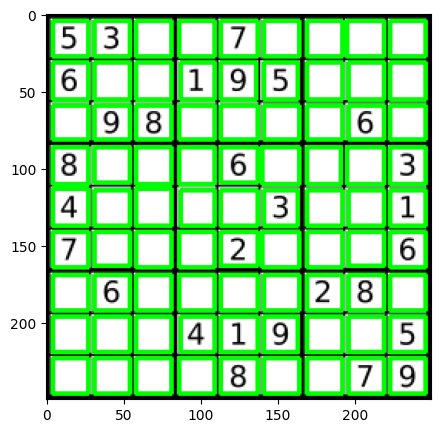

In [491]:
imageCopy=img.copy()
count=0
for c in cnts:
    if(cv2.contourArea(c)>300 and cv2.contourArea(c)<550):
        count=count+1
        rect=cv2.boundingRect(c)
        x,y,w,h=rect
        cv2.rectangle(imageCopy,(x,y),(x+w,y+h),(0,255,0),2)
print(count)
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imageCopy[..., ::-1])
plt.show()        

In [492]:
import pytesseract as pyt
import os

pyt.pytesseract.tesseract_cmd="C:\\Users\\Administrator\\AppData\\Local\\Tesseract-OCR\\tesseract.exe"

def get_num(img):
    return pyt.image_to_string(img,config=r'--oem 3 --psm 6 outbase digits')

In [493]:
imageCopy=img.copy()
count=0
num=[]
for c in cnts:
    if(cv2.contourArea(c)>300 and cv2.contourArea(c)<550):
        count=count+1
        rect=cv2.boundingRect(c)
        x,y,w,h=rect
        array=np.array(imageCopy[y:y+h,x:x+w])
        num.append(get_num(array))

In [494]:
def divide_chunks(l,n):
    for i in range(0,len(l),n):
        yield l[i:i+n]
n=9
matrix=list(divide_chunks(num,n))
matrix

[['5\n', '3\n', '', '', '7\n', '', '', '', ''],
 ['6\n', '', '', '1\n', '9\n', '5\n', '', '', ''],
 ['', '9\n', '8\n', '', '', '', '', '6\n', ''],
 ['8\n', '', '', '', '6\n', '', '', '', '3\n'],
 ['4\n', '', '', '', '', '3\n', '', '', '1\n'],
 ['7\n', '', '', '', '2\n', '', '', '', '6\n'],
 ['', '6\n', '', '', '', '', '2\n', '8\n', ''],
 ['', '', '', '4\n', '1\n', '9\n', '', '', '5\n'],
 ['', '', '', '', '8\n', '', '', '7\n', '9\n']]

In [495]:
import copy

mat = copy.deepcopy(matrix)
for n in mat:
    for j, i in enumerate(n):
        if i == '' or i=='-':
            n[j] = '0'
        elif len(i) > 0:  # Boş değilse
            n[j] = i[0]

mat

[['5', '3', '0', '0', '7', '0', '0', '0', '0'],
 ['6', '0', '0', '1', '9', '5', '0', '0', '0'],
 ['0', '9', '8', '0', '0', '0', '0', '6', '0'],
 ['8', '0', '0', '0', '6', '0', '0', '0', '3'],
 ['4', '0', '0', '0', '0', '3', '0', '0', '1'],
 ['7', '0', '0', '0', '2', '0', '0', '0', '6'],
 ['0', '6', '0', '0', '0', '0', '2', '8', '0'],
 ['0', '0', '0', '4', '1', '9', '0', '0', '5'],
 ['0', '0', '0', '0', '8', '0', '0', '7', '9']]

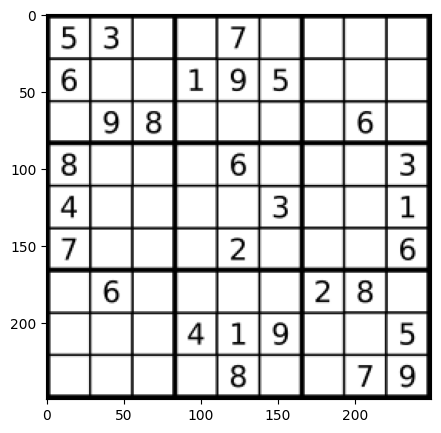

In [496]:
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imageCopy[..., ::-1])
plt.show()   

In [497]:
for row in mat:
    for i,j in enumerate(row):
        row[i]=int(j)
mat

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 0, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]

In [498]:
grid=copy.deepcopy(mat)

In [499]:
M = 9

def puzzle(a):
    for i in range(M):
        for j in range(M):
            print(a[i][j], end=" ")
        print()

def solve(grid, row, col, num):
    for x in range(M):
        if grid[row][x] == num:
            return False
    for x in range(M):
        if grid[x][col] == num:
            return False
    startRow = row - row % 3
    startCol = col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i + startRow][j + startCol] == num:
                return False
    return True

def Sudoku(grid, row, col):
    if row == M:
        return True
    if col == M:
        return Sudoku(grid, row + 1, 0)
    if grid[row][col] > 0:
        return Sudoku(grid, row, col + 1)
    for num in range(1, M + 1):
        if solve(grid, row, col, num):
            grid[row][col] = num
            if Sudoku(grid, row, col + 1):
                return True
        grid[row][col] = 0
    return False

if Sudoku(grid, 0, 0):
    print("Solution found:")
    puzzle(grid)
else:
    print("There is no solution")

Solution found:
5 3 4 6 7 8 9 1 2 
6 7 2 1 9 5 3 4 8 
1 9 8 3 4 2 5 6 7 
8 5 9 7 6 1 4 2 3 
4 2 6 8 5 3 7 9 1 
7 1 3 9 2 4 8 5 6 
9 6 1 5 3 7 2 8 4 
2 8 7 4 1 9 6 3 5 
3 4 5 2 8 6 1 7 9 


In [505]:
bound=[]
for c in cnts:
    if(cv2.contourArea(c)>300 and cv2.contourArea(c)<550):
        count=count+1
        rect=cv2.boundingRect(c)
        bound.append(rect)

In [506]:
n=9
bound=list(divide_chunks(bound,n))
bound

[[(4, 4, 23, 23),
  (31, 4, 23, 23),
  (58, 4, 23, 23),
  (86, 4, 23, 23),
  (113, 4, 24, 23),
  (141, 4, 23, 23),
  (169, 4, 23, 23),
  (195, 4, 24, 23),
  (223, 4, 23, 23)],
 [(4, 31, 23, 24),
  (31, 31, 23, 24),
  (58, 31, 23, 24),
  (87, 31, 22, 24),
  (113, 31, 23, 24),
  (141, 31, 22, 24),
  (169, 31, 23, 24),
  (196, 31, 23, 24),
  (223, 31, 23, 24)],
 [(4, 59, 23, 22),
  (31, 59, 23, 22),
  (58, 59, 23, 22),
  (86, 59, 23, 22),
  (113, 59, 24, 22),
  (141, 59, 23, 22),
  (169, 59, 23, 22),
  (196, 59, 23, 22),
  (223, 59, 23, 22)],
 [(4, 86, 23, 24),
  (31, 86, 23, 23),
  (58, 86, 23, 24),
  (86, 86, 23, 24),
  (113, 86, 24, 23),
  (140, 86, 24, 24),
  (169, 86, 22, 24),
  (195, 86, 24, 24),
  (223, 86, 23, 24)],
 [(4, 113, 23, 24),
  (58, 113, 23, 24),
  (31, 114, 23, 23),
  (87, 114, 22, 23),
  (113, 114, 24, 23),
  (141, 114, 22, 23),
  (169, 114, 23, 23),
  (196, 114, 23, 23),
  (223, 114, 23, 23)],
 [(4, 141, 23, 23),
  (31, 141, 23, 22),
  (58, 141, 23, 23),
  (86, 141, 2

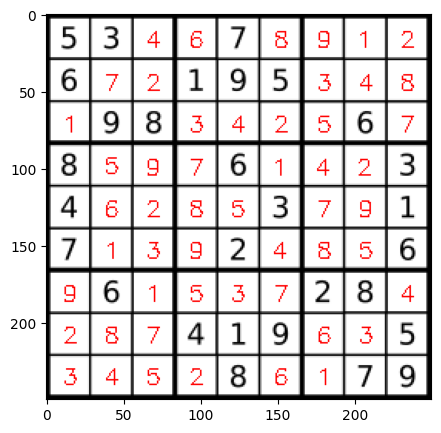

In [516]:
imageCopy=img.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1
color = (0, 0, 255)  # Kırmızı renk

for i, m in enumerate(mat):
    for j, n in enumerate(m):
        if mat[i][j] != grid[i][j]:
            x, y, w, h = bound[i][j]
            text = str(grid[i][j])
            
            # Metin boyutunu hesapla
            (text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, font_thickness)
            
            # Metni ortalamak için gerekli koordinatları hesapla
            text_x = x + (w - text_width) // 2
            text_y = y + (h + text_height) // 2
            
            # Metni çiz
            cv2.putText(imageCopy, text, (text_x, text_y), font, font_scale, color, font_thickness)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imageCopy[..., ::-1])
plt.show() 